### Import data

In [5]:
include("importData.jl")
include("ODEmodel.jl")
include("plot.jl")

# import data from the path
conc_l, pop, g2, g1, g2_0, g1_0 = setup_data("lapatinib");# in which:
# pop: population data
# g1, g2: g1 and g2 data
# initial: initial number of cells in g1 and in g2 at time 0


┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/dde/lapatinib/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/dde/lapatinib/DrugResponseModel.jl/src/importData.jl:37


### Estimate 

In [6]:
# i is the number of the column we are using from the data (# of trial)
i = 6

# initial guess
p  = [8.870525324, 8.492087169, 0.43447323, 7.67847790]

# setting lowest delay for tau1 to be half an hour and for tau2 to be 3 hours.
low = 0.005*ones(4)
upp = 0.1*ones(4)
params_ode = zeros(4, 8)

# ODE optimization and estimation of the parameters
for i in 1:8
    params_ode[:, i] = ODEoptimizer(low, upp, p, i, g1, g2, g1_0, g2_0)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 0.61 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 16369.03
Function evals per second = 16532.70
Improvements/step = 0.21050
Total function evaluations = 10101


Best candidate found: [0.0596124, 0.0331098, 0.005, 0.005]

Fitness: 312.984991923

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 0.61 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 16468.16
Function evals per second = 16637.76
Improvements/step = 0.22670
Total function evaluations = 10104


Best candidate found: [0.051

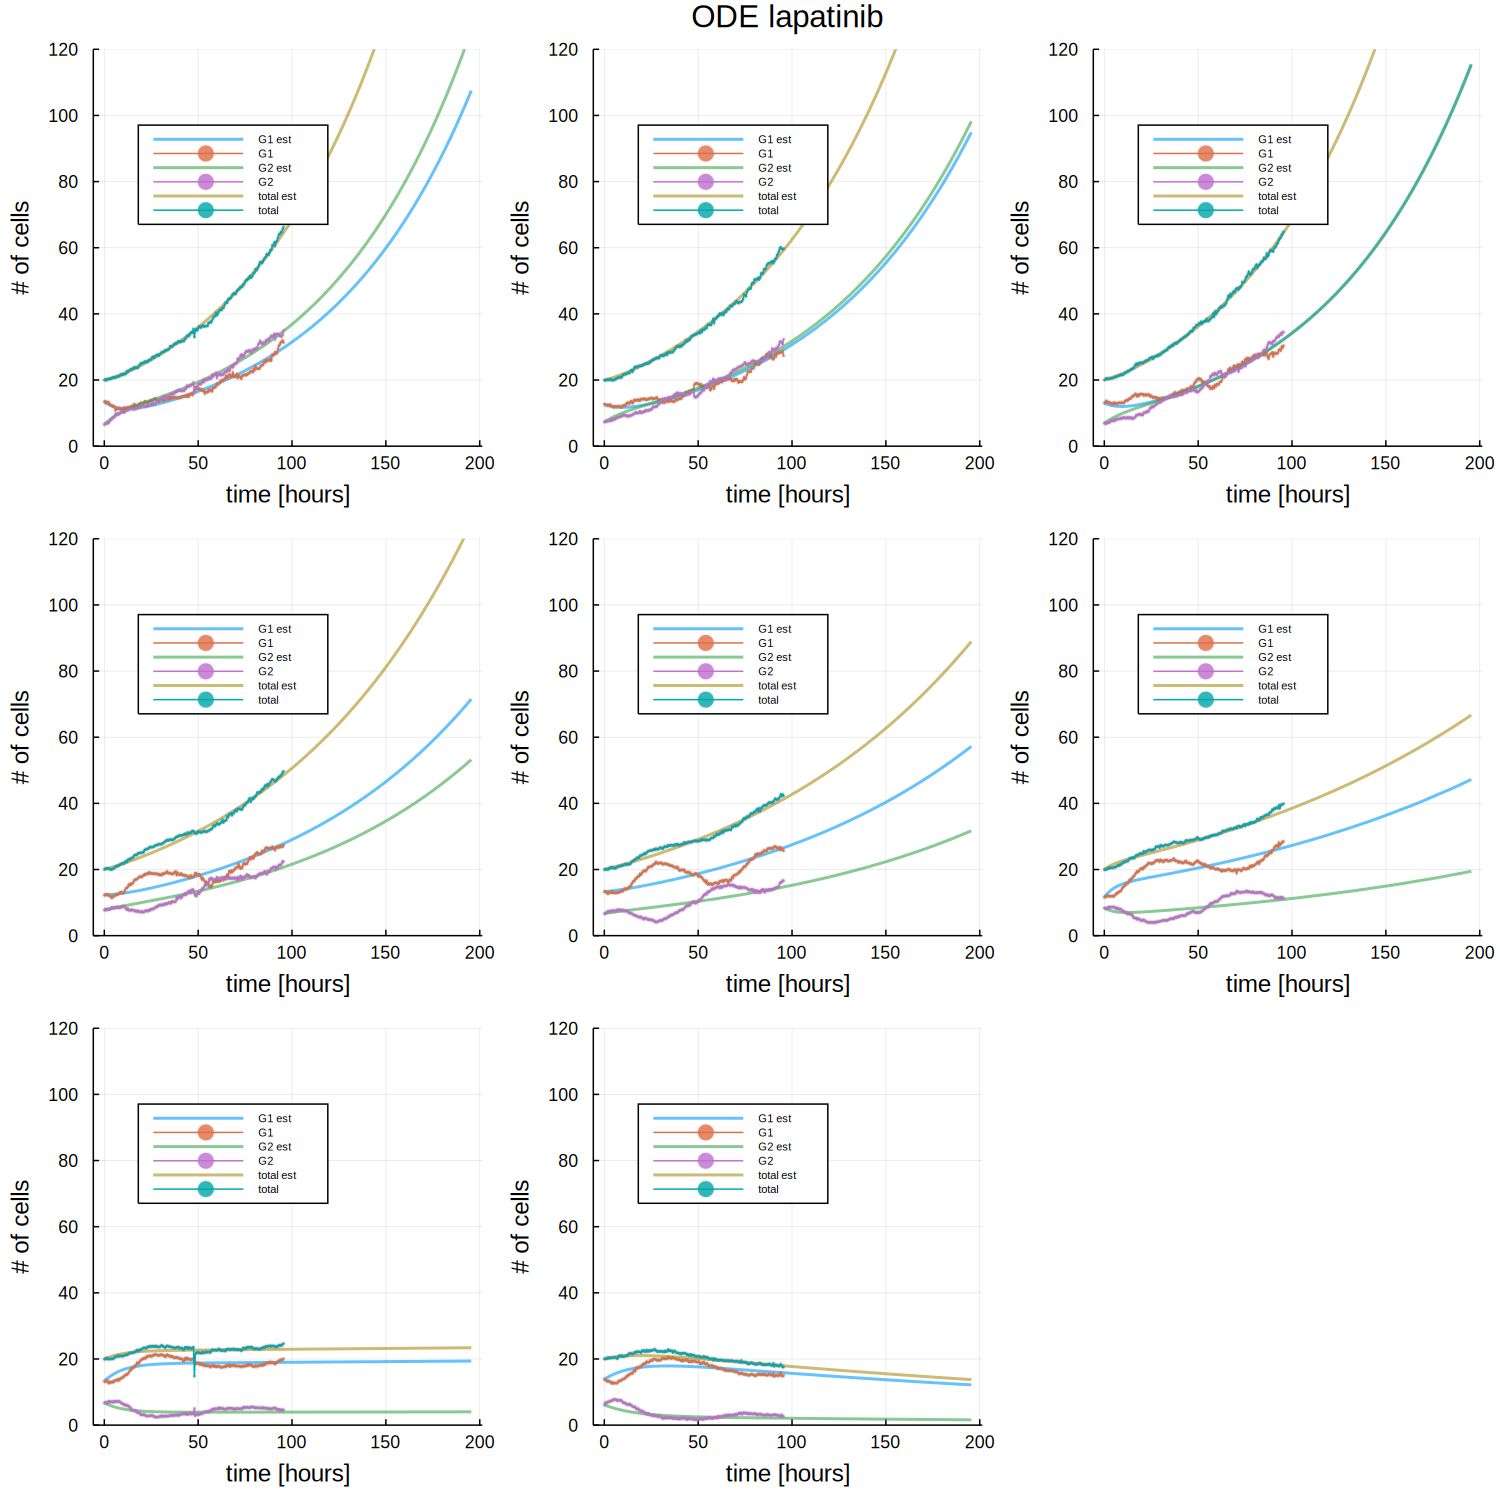

In [8]:
# plotting the fitted curves
r1 = ode_plotIt(params_ode[:, 1], g1, g2, g1_0, g2_0, pop, 1, "")
r2 = ode_plotIt(params_ode[:, 2], g1, g2, g1_0, g2_0, pop, 2, "ODE lapatinib")
r3 = ode_plotIt(params_ode[:, 3], g1, g2, g1_0, g2_0, pop, 3, "")
r4 = ode_plotIt(params_ode[:, 4], g1, g2, g1_0, g2_0, pop, 4, "")
r5 = ode_plotIt(params_ode[:, 5], g1, g2, g1_0, g2_0, pop, 5, "")
r6 = ode_plotIt(params_ode[:, 6], g1, g2, g1_0, g2_0, pop, 6, "")
r7 = ode_plotIt(params_ode[:, 7], g1, g2, g1_0, g2_0, pop, 7, "")
r8 = ode_plotIt(params_ode[:, 8], g1, g2, g1_0, g2_0, pop, 8, "")
plot(r1, r2, r3, r4, r5, r6, r7, r8)
plot!(size=(1000, 1000))
ylims!((0.0, 120.0))